# import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### # Initialize file location

In [4]:
file_path = "E:/VSCode_2023/Project/Proj_DataAnalysis/Brainwave_Matrix_Solutions/Data/Electric Vehicle Sales by State in India.csv"

In [8]:
# Load dataset
df = pd.read_csv(file_path)
df.head(2)

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0


In [6]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [ ]:
# Check for missing values in the dataframe
missing_values = df.isnull().sum()
missing_values

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

## Initial Observations:

- The dataset contains 96,845 rows and 8 columns.

- The key columns are:
     - Year: Represents the year of sales.
     - Month_Name: Month of the sale.
     - Date: Full date (potentially redundant with Year and Month_Name).
     - State: Indian state where sales occurred.
     - Vehicle_Class, Vehicle_Category, Vehicle_Type: Vehicle classifications.
     - EV_Sales_Quantity: Number of EVs sold.

- Data types:
     - Year and EV_Sales_Quantity are numerical (float64).
     - Other columns are categorical (object).

# Statistical Analysis

In [9]:
# Descriptive statistics for numerical columns
numerical_summary = df.describe()
numerical_summary

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


In [10]:

# Unique values count for categorical columns
categorical_summary = df.select_dtypes(include=['object']).nunique()
categorical_summary

Month_Name           12
Date                121
State                34
Vehicle_Class        73
Vehicle_Category      5
Vehicle_Type         12
dtype: int64

## Observations for Descriptive Statistics:

- Numerical Data:
     - Year Range: 2014 - 2024.

     - EV Sales Quantity:
          - Mean Sales: 37.11
          - Max Sales: 20,584
          - Standard Deviation: 431.57 (indicating high variability)
          - Median (50th percentile): 0 (suggesting many entries have zero sales)

- Categorical Data:
     - Months Represented: 12 (all months)
     - Unique Dates: 121 different dates.
     - States Covered: 34 Indian states/UTs.
     
     - Vehicle Classification:
          - Vehicle Classes: 73 different types.
          - Vehicle Categories: 5 (e.g., Bus, Car, Others, etc.)
          - Vehicle Types: 12 distinct types.

# Central Tendency Measures

In [12]:
# Compute central tendency measures
mean_sales = df["EV_Sales_Quantity"].mean()
median_sales = df["EV_Sales_Quantity"].median()
mode_sales = df["EV_Sales_Quantity"].mode()[0]

print(f"Mean Sales : {mean_sales}")
print(f"Median Sales : {median_sales}")
print(f"Mode Sales : {mode_sales}")

Mean Sales : 37.10889565801022
Median Sales : 0.0
Mode Sales : 0.0


## Visualize Sales Distribution.

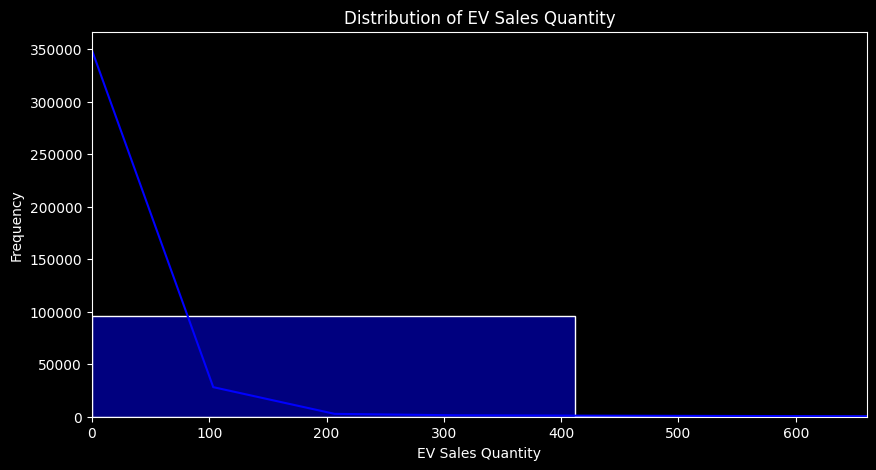

In [13]:
# Plot EV Sales distribution
plt.figure(figsize=(10,5))
sns.histplot(df["EV_Sales_Quantity"], bins=50, kde=True, color="blue")
plt.title("Distribution of EV Sales Quantity")
plt.xlabel("EV Sales Quantity")
plt.ylabel("Frequency")
plt.xlim(0, df["EV_Sales_Quantity"].quantile(0.99))  # Limit extreme values for better visualization
plt.show()

## Observation for Central Tendency Analysis of EV Sales:

- The histogram shows a highly skewed distribution, with most sales quantities concentrated at low values.
- A small number of high sales values (outliers) significantly raise the mean.
- Since both the mode and median are 0, a large portion of the data represents zero EV sales.

In [14]:
# Aggregate total EV sales per year
sales_by_year = df.groupby("Year")["EV_Sales_Quantity"].sum()
sales_by_year

Year
2014.0       2392.0
2015.0       7805.0
2016.0      49855.0
2017.0      87420.0
2018.0     130254.0
2019.0     166819.0
2020.0     124684.0
2021.0     331498.0
2022.0    1024723.0
2023.0    1525179.0
2024.0     143182.0
Name: EV_Sales_Quantity, dtype: float64

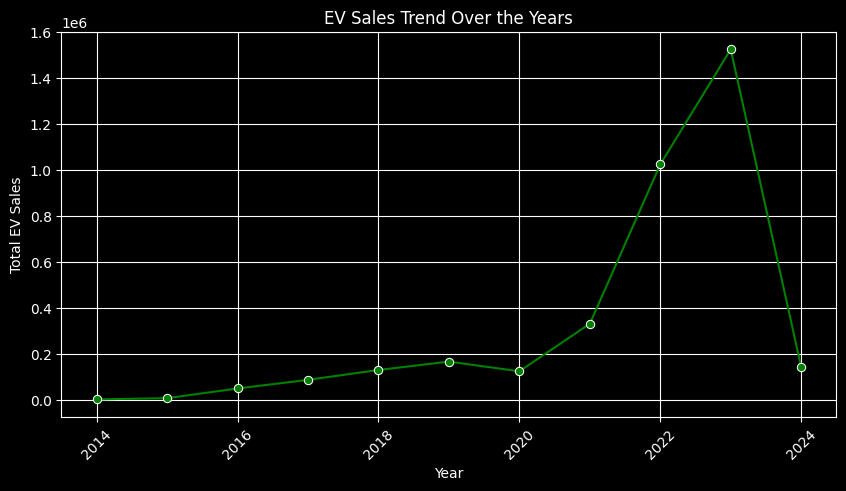

In [15]:
# Plot sales trend over the years
plt.figure(figsize=(10,5))
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values, marker="o", color="green")
plt.title("EV Sales Trend Over the Years")
plt.xlabel("Year")
plt.ylabel("Total EV Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [16]:
# Aggregate EV sales by state
top_states = df.groupby("State")["EV_Sales_Quantity"].sum().sort_values(ascending=False).head(10)
top_states

State
Uttar Pradesh    732074.0
Maharashtra      401535.0
Karnataka        315498.0
Delhi            268538.0
Rajasthan        228573.0
Bihar            213465.0
Tamil Nadu       206902.0
Gujarat          176713.0
Assam            151917.0
Kerala           133246.0
Name: EV_Sales_Quantity, dtype: float64

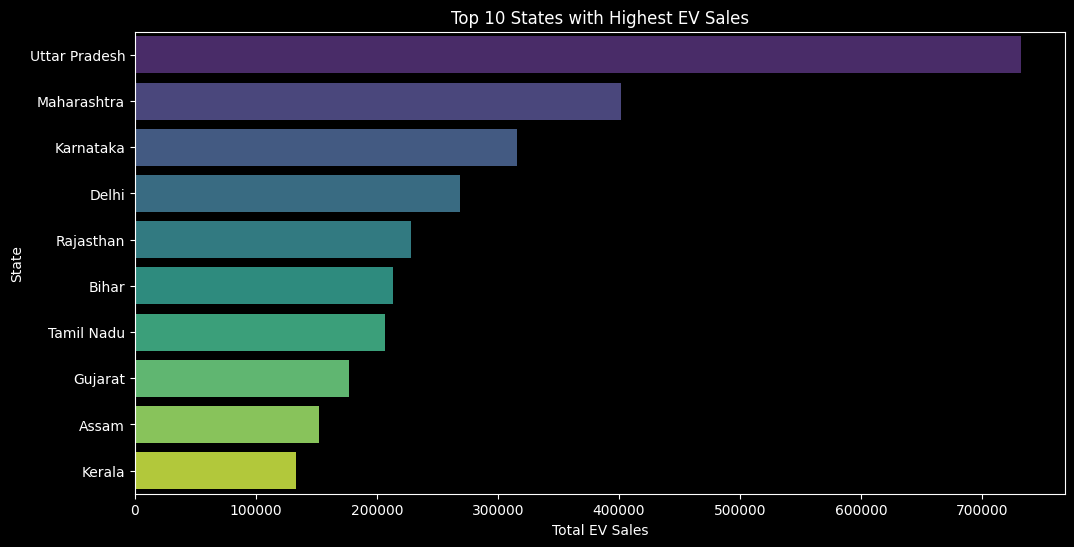

In [17]:
# Plot top 10 states with highest EV sales
plt.figure(figsize=(12,6))
sns.barplot(x=top_states.values, y=top_states.index, palette="viridis")
plt.title("Top 10 States with Highest EV Sales")
plt.xlabel("Total EV Sales")
plt.ylabel("State")
plt.show()

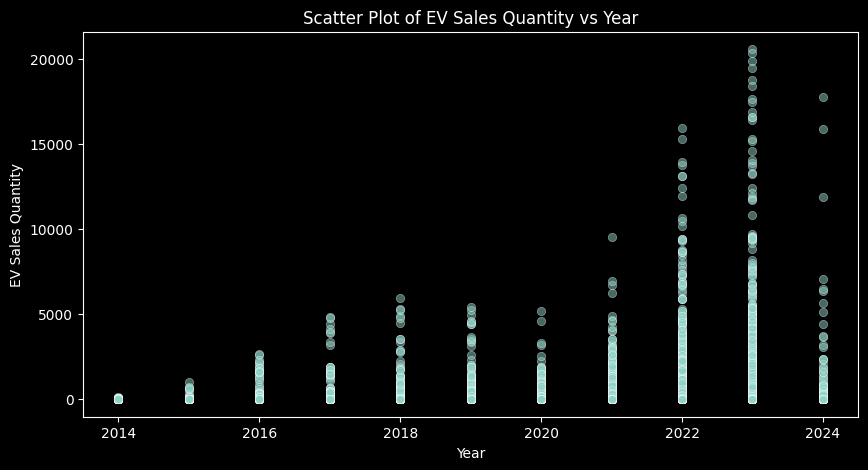

In [23]:
# Scatter plot for EV sales quantity vs year
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["Year"], y=df["EV_Sales_Quantity"], alpha=0.5)
plt.title("Scatter Plot of EV Sales Quantity vs Year")
plt.xlabel("Year")
plt.ylabel("EV Sales Quantity")
plt.show()

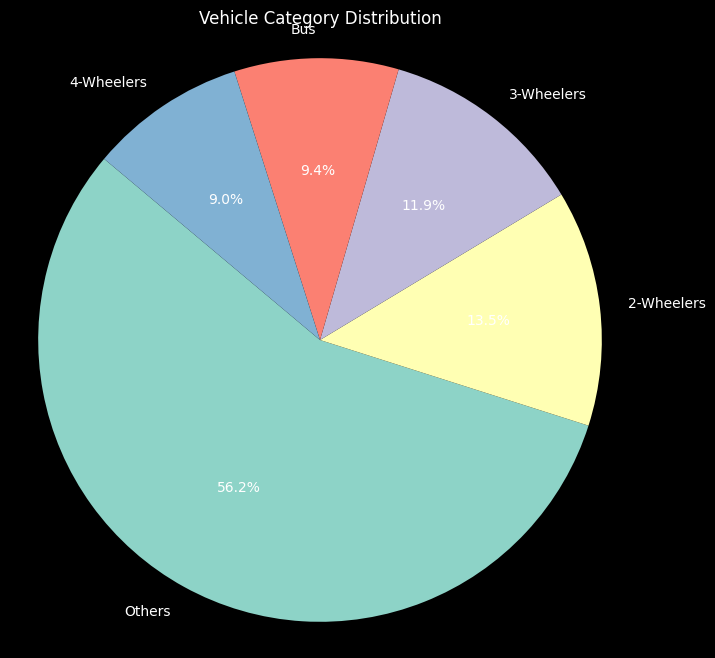

In [19]:
# Pie chart for vehicle categories
vehicle_category_counts = df["Vehicle_Category"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(vehicle_category_counts, labels=vehicle_category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title("Vehicle Category Distribution")
plt.axis('equal')
plt.show()

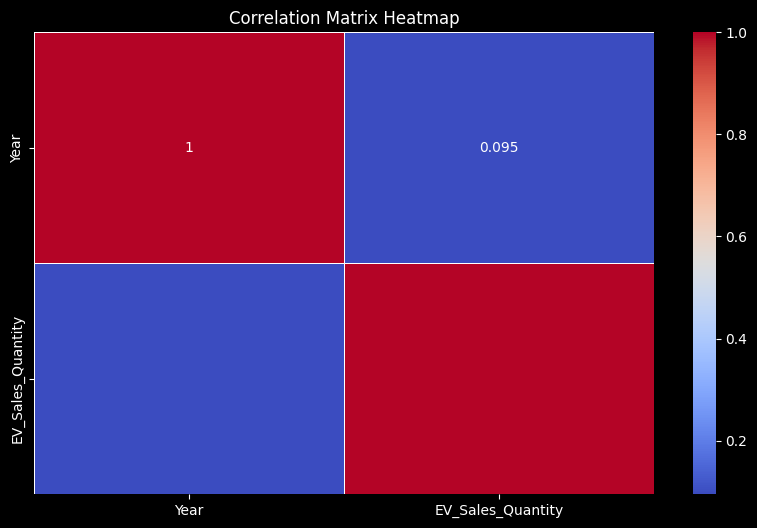

In [22]:
# Heatmap for correlation matrix
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Observations through Visualizations

1. EV Sales Trend Over the Years:
     - A line graph shows the total EV sales increasing significantly over the years.
     - The trend suggests rapid growth, particularly in recent years.

2. Top 10 States with the Highest EV Sales:
     - The bar chart highlights the states with the highest EV sales.
     - Certain states have significantly higher EV adoption rates.

3. Sales Distribution:
     - The distribution of EV sales quantity is highly skewed, with most sales quantities concentrated at low values.
     - A small number of high sales values (outliers) significantly raise the mean.
     - Both the mode and median are 0, indicating that a large portion of the data represents zero EV sales.

4. Vehicle Category Distribution:
     - The "Others" category has the highest count, followed by 2-Wheelers and 3-Wheelers.
     - Buses and 4-Wheelers have relatively lower counts compared to other categories.

5. Correlation Matrix:
     - There is a weak positive correlation between the year and EV sales quantity (correlation coefficient: 0.095326).
     - The correlation matrix heatmap shows that there are no strong correlations between the numerical variables in the dataset.


In [ ]:
# Aggregate EV sales by state and month
sales_by_state_month = df.groupby(["State", "Month_Name"])["EV_Sales_Quantity"].sum().unstack()
sales_by_state_month

Month_Name,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
State,,,,,,,,,,,,
Andaman & Nicobar Island,11.0,4.0,45.0,29.0,18.0,26.0,11.0,35.0,2.0,13.0,6.0,2.0
Andhra Pradesh,7747.0,5312.0,7310.0,6502.0,7597.0,4972.0,3939.0,8756.0,6828.0,6835.0,6217.0,5341.0
Arunachal Pradesh,2.0,5.0,6.0,1.0,7.0,3.0,0.0,5.0,1.0,4.0,2.0,4.0
Assam,9439.0,13074.0,14597.0,10128.0,12377.0,12170.0,10974.0,12292.0,11198.0,15043.0,15084.0,15541.0
Bihar,10315.0,18320.0,24069.0,13040.0,20828.0,16643.0,13056.0,16516.0,11601.0,22352.0,23284.0,23441.0
Chandigarh,584.0,1004.0,1256.0,584.0,1166.0,813.0,897.0,944.0,732.0,1300.0,1156.0,1017.0
Chhattisgarh,4698.0,6018.0,7120.0,4389.0,7910.0,5593.0,4596.0,5633.0,5165.0,10475.0,7676.0,6002.0
DNH and DD,30.0,27.0,57.0,31.0,61.0,27.0,22.0,31.0,34.0,40.0,34.0,37.0
Delhi,16005.0,20801.0,30097.0,19526.0,26606.0,20329.0,16806.0,25087.0,17237.0,27003.0,27727.0,21314.0


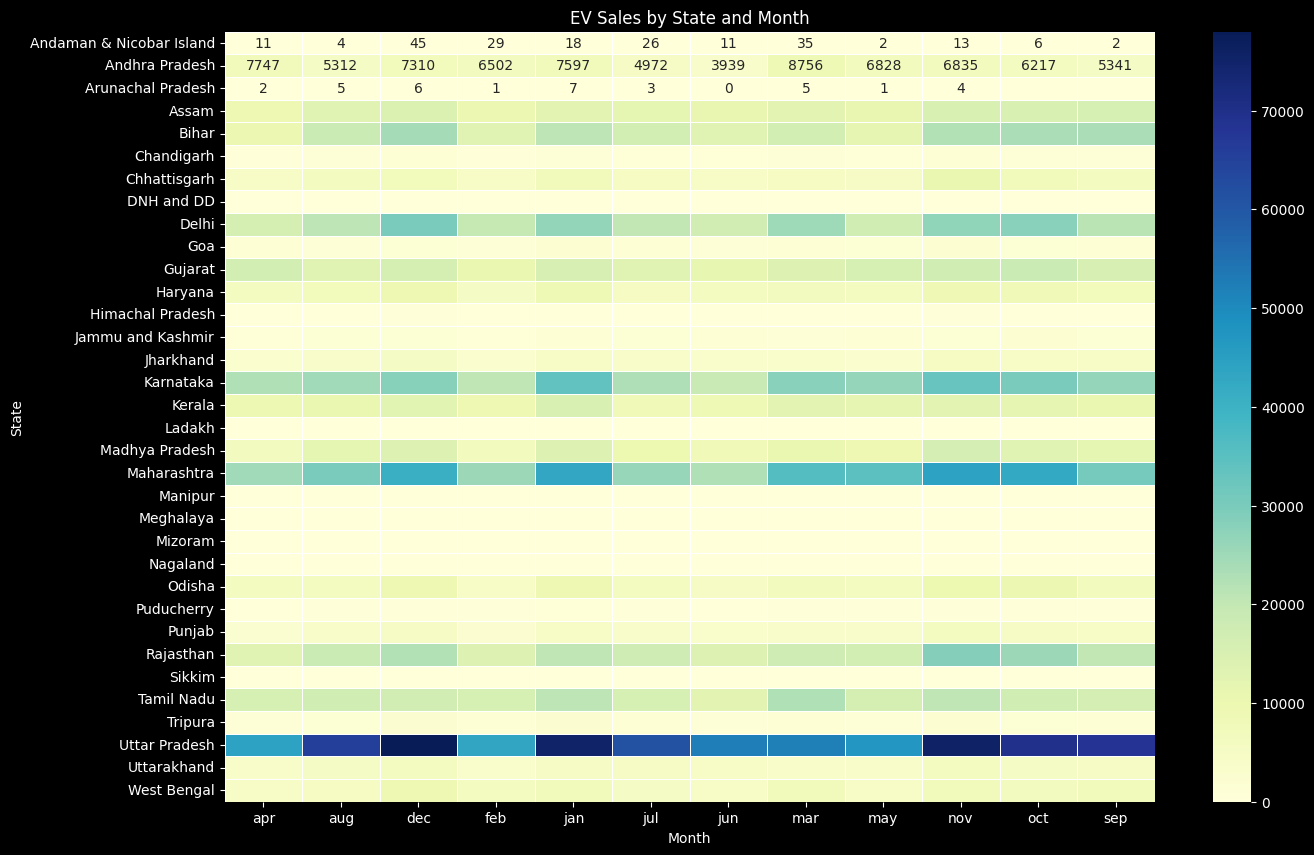

In [32]:
# Plot heatmap for EV sales by state and month
plt.figure(figsize=(15,10))
sns.heatmap(sales_by_state_month, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5)
plt.title("EV Sales by State and Month")
plt.xlabel("Month")
plt.ylabel("State")
plt.show()

## Observations for Heatmap of EV Sales by State and Month:

1. High Sales Concentration in Specific States:
     - States like Uttar Pradesh, Maharashtra, Karnataka, and Delhi show consistently high EV sales across all months.
     - These states are leading in EV adoption and have a significant impact on the overall sales figures.

2. Seasonal Trends:
     - Some states exhibit seasonal trends in EV sales. For example, Uttar Pradesh and Bihar show higher sales during certain months, indicating possible seasonal demand or promotional activities.

3. Low Sales in Certain States:
     - States like Sikkim, Nagaland, and Mizoram have very low EV sales throughout the year, indicating limited adoption or market presence in these regions.

4. Monthly Sales Patterns:
     - The heatmap reveals that certain months, such as January and December, tend to have higher sales across multiple states. This could be due to year-end promotions or new model releases.

5. Emerging Markets:
     - States like Rajasthan, Tamil Nadu, and Gujarat show a growing trend in EV sales, indicating emerging markets with increasing adoption rates.

6. Consistent Sales:
     - States like Andhra Pradesh and Kerala show consistent sales throughout the year, indicating steady demand and market stability.

7. Impact of Policy and Infrastructure:
     - The variation in sales across states may reflect the impact of state-specific policies, incentives, and infrastructure development for EVs.